<a href="https://colab.research.google.com/github/pershikova/bioinf-project-2023/blob/main/%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82_%D0%BF%D0%BE_%D0%A2%D0%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Реализация Алгоритма Кнута-Морриса-Пратта**

**Постановка задачи:**
Реализовать алгоритмом Кнута-Томаса-Пратта выравнивание последовательности P на текст T. Данные задаются в формате fasta. Вывод - локус в Т вхождения P.

**Input:** P.fa T.fa

**Output:** Alignment locus

**Sample_input:**

*>*P

ATC

*>*T

AATCCG

**Sample_output:**

2


**Реализация алгоритма**

In [ ]:
import numpy as np

In [ ]:
# загрузка последовательностей текста и образца

!wget https...
!wget https...

In [ ]:
def read_fasta(file_name):
    # Инициализация пустой строки для хранения строки заголовка
    defline = ''
    # Инициализация пустой строки для хранения последовательности
    sequence = ''
    # Открытие файла для чтения
    F = open(file_name)
    # Инициализация пустого словаря, где ключи это названия (последовательностей), а значения сами последовательности - если в *.fa файле она не одна
    sequence = {}

    #считаем количество последовательностей
    i=0

    # Итерация по строкам в файле
    for line in F:
        # Удаление лишних пробелов
        line = line.strip()

        # Проверка, является ли строка строкой заголовка (начинается с '>')
        if line[0] == '>':
            defline = line
            i+=1
            # Удаление символа '>' из строки заголовка
            defline = defline.replace('>', '')
            if defline =='':
                defline = str(i)
        #Проверка поступила на вход строка заголовка/последовательности или пустая строка
        if line != '' and line[0] != '>':
          #выравнивание регистра для последоватльности
            line = line.upper()
            #Проверка есть ли последний сохраненный заголовок уже в ключах
            if defline in sequence.keys():
                #Есть - добавляем последовательность к сущ ключу
                sequence[defline] += line
            else:
                #Нет - доабвляем последовательность по последнему
                sequence[defline] = line

    # Закрытие файла
    F.close()
    # Возвращение последовательности
    return sequence

In [ ]:
t=read_fasta('t_example.fna')
p=read_fasta('p_example.fna')

In [ ]:
def KMPSearch(pat, txt):
    # Получаем длины шаблона и текста
    M = len(pat)
    N = len(txt)
    # Проверка на пустой образец
    if M == 0:
        print("Ошибка: Пустой образец")
        return []
    # Проверка на пустой текст
    if N == 0:
        print("Ошибка: Пустой текст")
        return []
    # Шаг 1: Создаем массив lps[], который будет содержать значения самого длинного префикса-суффикса для шаблона
    lps = [0] * M
    # Шаг 2: Подготовка шаблона (вычисление массива lps)
    computeLPSArray(pat, M, lps)
    # Шаг 3: Инициализация указателей для текста (i) и шаблона (j)
    i = j = 0
    indices = []  # Список для хранения индексов, где найден образец
    while i < N:
        # Шаг 4: Если символы совпадают, перемещаем оба указателя
        if pat[j] == txt[i]:
            i += 1
            j += 1
            # Шаг 5: Если найден весь шаблон, обновляем j, используя lps, и добавляем индекс в список
            if j == M:
                indices.append(i - j)
                j = lps[j - 1]
        else:
            # Шаг 6: Если есть несовпадение после некоторого количества совпадений
            if j != 0:
                # Перемещаем j к предыдущей совпадающей позиции, используя lps
                j = lps[j - 1]
            else:
                # Если j уже в начале шаблона, перемещаем i к следующему символу
                i += 1
    # Преобразование индексов в массив NumPy и возврат
    numeration = np.array(indices) + 1
    return numeration
# Реализация префикс-функции
def computeLPSArray(pat, M, lps):
    len = 0  # длина предыдущего самого длинного префикса-суффикса
    # Шаг 1: lps[0] всегда равно 0
    lps[0] = 0
    i = 1
    # Шаг 2: Вычисление lps[i] для i = 1 до M-1
    while i < M:
        if pat[i] == pat[len]:
            len += 1
            lps[i] = len
            i += 1
        else:
            # Шаг 3: Если есть несовпадение
            if len != 0:
                # Перемещаем len к предыдущей совпадающей позиции, используя lps
                len = lps[len - 1]
            else:
                # Если len уже в начале, устанавливаем lps[i] в 0 и перемещаем i к следующему символу
                lps[i] = 0
                i += 1



In [ ]:
# Пример использования
# txt = input()
# pat = input()


txt = t
print(txt)
pat = p
print(pat)

for text_name in (txt.keys()):
    for pattern_name in (pat.keys()):
        result = KMPSearch(pat[pattern_name], txt[text_name])
        if len(result)==0:
            print(f"Образец {pattern_name} не найден в тексте {text_name}")
        else:
            print(f"Образец {pattern_name} найден в тексте {text_name} по индексам: " + ', '.join(map(str, result)))

# Вывод результатов


{'t example': 'AATCCG', 't example 2': 'ATCCTCTCTATCGCATC'}
{'p example': 'ATC', 'p example 2': 'ATCGCA'}
Образец p example найден в тексте t example по индексам: 2
Образец p example 2 не найден в тексте t example
Образец p example найден в тексте t example 2 по индексам: 1, 10, 15
Образец p example 2 найден в тексте t example 2 по индексам: 10


**Оптимизация алгоритма**

In [ ]:
def KMPWithFailureTable(pat, txt):
    # Получаем длины шаблона и текста
    M = len(pat)
    N = len(txt)
    # Проверка на пустой образец
    if M == 0:
        print("Ошибка: Пустой образец")
        return []
    # Проверка на пустой текст
    if N == 0:
        print("Ошибка: Пустой текст")
        return []
    # Шаг 1: Создаем массив lps[], который будет содержать значения самого длинного префикса-суффикса для шаблона
    lps = [0] * M
    # Шаг 2: Подготовка шаблона (вычисление массива lps)
    computeLPSArray(pat, M, lps)
    # Шаг 3: Инициализация указателей для текста (i) и шаблона (j)
    i = j = 0
    indices = []  # Список для хранения индексов, где найден образец
    # Шаг 4: Построение таблицы FT
    FT = buildFailureTable(pat)
    while i < N:
        # Шаг 5: Если символы совпадают, перемещаем оба указателя
        if pat[j] == txt[i]:
            i += 1
            j += 1
            # Шаг 6: Если найден весь шаблон, обновляем j, используя lps, и добавляем индекс в список
            if j == M:
                indices.append(i - j)
                j = lps[j - 1]
        else:
            # Шаг 7: Если есть несовпадение после некоторого количества совпадений
            if j != 0:
                # Перемещаем j к предыдущей совпадающей позиции, используя lps
                j = lps[j - 1]
            else:
                # Если j уже в начале шаблона, перемещаем i к следующему символу
                i += 1
    numeration = np.array(indices) + 1
    return numeration

def buildFailureTable(pat):
    # Максимальный размер алфавита Unicode
    K = 256
    M = len(pat)
    # Инициализация таблицы FT
    FT = [[0] * M for _ in range(K)]
    # Инициализация первой строки таблицы
    FT[ord(pat[0])][0] = 1
    # Инициализация переменной для отслеживания предыдущей строки
    prev = 0
    # Построение таблицы FT
    for l in range(1, M):
        for k in range(K):
            FT[k][l] = FT[k][prev]
        FT[ord(pat[l])][l] = l + 1
        prev = FT[ord(pat[l])][prev]
    return FT



In [ ]:
# Пример использования
txt = read_fasta(input("Введите название файла, содержащего текст: "))
print('Текст:', txt)
pat = read_fasta(input("Введите название файла, содержащего образец: "))
print('Образец:', pat)

for text_name in (txt.keys()):
    for pattern_name in (pat.keys()):
        result = KMPSearch(pat[pattern_name], txt[text_name])
        if not result.all():
            print(f"Образец {pattern_name} не найден в тексте {text_name}")
        else:
            print(f"Образец {pattern_name} найден в тексте {text_name} по индексам: " + ', '.join(map(str, result)))


Введите название файла, содержащего текст: t_example.fna
Текст: {'t example': 'AATCCG', 't example 2': 'ATCCTCTCTATCGCATC'}
Введите название файла, содержащего образец: p_example.fna
Образец: {'1': 'ATC', '2': 'ATCGCA'}
Образец 1 найден в тексте t example по индексам: 2
Образец 2 найден в тексте t example по индексам: 
Образец 1 найден в тексте t example 2 по индексам: 1, 10, 15
Образец 2 найден в тексте t example 2 по индексам: 10


**Наглядное сравнение двух программ**

In [ ]:
import time
import random

# Функция для генерации случайного текста заданного размера
def generate_random_text(size):
    return ''.join(random.choice('abcdefghijklmnopqrstuvwxyz') for _ in range(size))

# Функция для измерения времени выполнения заданного алгоритма
def measure_execution_time(algorithm, *args):
    start_time = time.time()
    algorithm(*args)
    end_time = time.time()
    return end_time - start_time

# Функция для запуска тестов производительности
def run_tests():
    # Размеры тестовых данных
    sizes = [10**3, 5*10**3, 10**4, 5*10**4, 10**5]
    # Списки для хранения времени выполнения обычного и оптимизированного алгоритмов
    times_regular = []
    times_optimized = []
    for size in sizes:
        # Генерация случайного текста и образца
        text = generate_random_text(size)
        pattern = generate_random_text(size // 10)  # Образец меньше текста
        # Измеряем время выполнения для обычного алгоритма
        time_regular = measure_execution_time(KMPSearch, pattern, text)
        times_regular.append(time_regular)
        # Измеряем время выполнения для оптимизированного алгоритма
        time_optimized = measure_execution_time(KMPWithFailureTable, pattern, text)
        times_optimized.append(time_optimized)
    return sizes, times_regular, times_optimized

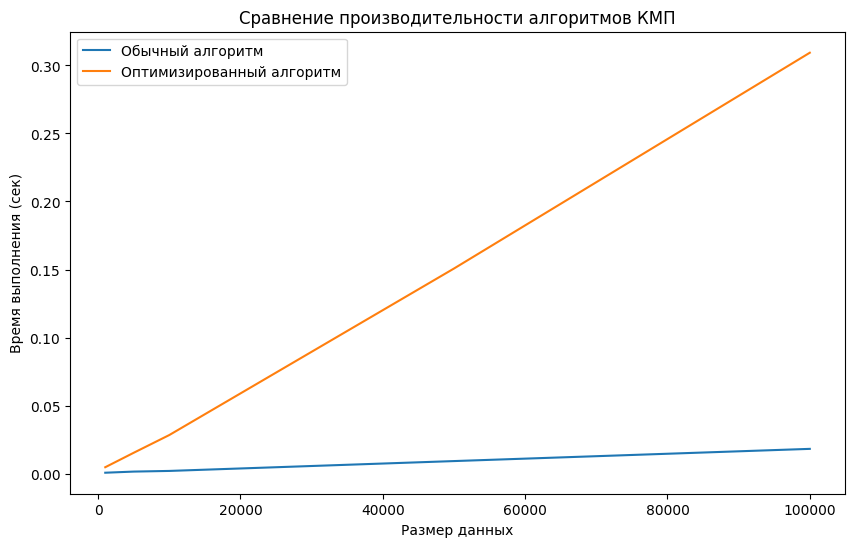

In [ ]:
import matplotlib.pyplot as plt

# Функция для построения графика производительности
def plot_performance(sizes, times_regular, times_optimized):
    # Создаем новое графическое окно размером 10x6 дюймов
    plt.figure(figsize=(10, 6))
    # Строим линии для обычного и оптимизированного алгоритмов
    plt.plot(sizes, times_regular, label='Обычный алгоритм')
    plt.plot(sizes, times_optimized, label='Оптимизированный алгоритм')
    # Устанавливаем подписи осей и заголовок графика
    plt.xlabel('Размер данных')
    plt.ylabel('Время выполнения (сек)')
    plt.title('Сравнение производительности алгоритмов КМП')
    # Добавляем легенду для обозначения линий
    plt.legend()
    # Отображаем график
    plt.show()
# Запускаем тесты и строим график
sizes, times_regular, times_optimized = run_tests()
plot_performance(sizes, times_regular, times_optimized)

**Применение алгоритма к задачам**

Рассмотрим следующую задачу: используйте алгоритм КМП для эффективного поиска и удаления всех вхождений строки t из строки s.

In [ ]:
# Функция для вычисления массива LPS (longest proper prefix which is also suffix)
def computeLPS(t):
    m = len(t)
    lps = [0] * m  # Инициализируем массив LPS нулями
    length = 0
    i = 1
    while i < m:
        if t[i] == t[length]:
            # Если символы совпадают, увеличиваем длину и записываем в массив LPS
            length += 1
            lps[i] = length
            i += 1
        else:
            if length != 0:
                # Если есть несовпадение после некоторого количества совпадений,
                # перемещаемся к предыдущей позиции совпадения, используя LPS
                length = lps[length - 1]
            else:
                # Если длина уже 0, записываем 0 в текущую позицию и увеличиваем i
                lps[i] = 0
                i += 1
    return lps

# Функция для удаления всех вхождений строки t из строки s
def removeOccurrences(s, t):
    n = len(s)
    m = len(t)
    lps = computeLPS(t)  # Вычисляем массив LPS для шаблона t
    i = 0
    j = 0
    ans = ""
    while i < n:
        if j < m and s[i] == t[j]:
            # Если символы совпадают, увеличиваем i и j
            i += 1
            j += 1
            if j == m:
                # Если j стало равным длине t, значит, мы нашли вхождение t в s
                # Сбрасываем j до значения в массиве LPS и не копируем символы из i-j до i-1 в ans
                j = lps[j - 1]
        else:
            if j != 0:
                # Если несовпадение произошло после некоторого количества совпадений
                # Сбрасываем j до значения в массиве LPS
                j = lps[j - 1]
            else:
                # Если j уже в начале шаблона t, копируем символ из s[i] в ans и увеличиваем i
                ans += s[i]
                i += 1
    if len(ans) == 0:
        # Если ans пуста, значит, не было вхождений t в s, возвращаем s
        return s
    else:
        # Иначе возвращаем ans, которая содержит s без вхождений t
        return ans

# Пример использования
s = input()
t = input()

# Функция вызова
ans = removeOccurrences(s, t)

print(ans)

abcdefgabcabcdefghabc
abc
defgdefgh
